# Différences finies: problèmes stationnaires 1D
 
Dans ce notebook, on donne des exemples de codes pour résoudre quelques problèmes aux conditions aux limites et quelques problèmes aux valeurs propres. L'espace est toujours 1D, la variable $x$ sera dans un intervalle fini. 
 
 ## Premier problème du cours : Poisson 1D & Dirichlet 
 
 Notre premier code de différences finies. On veut résoudre
 $$ 
 \frac{d^2 f}{d x^2} = g \ , \ x \in [0,L]
 $$ 
 muni de conditions aux limites de type Dirichlet
 $$ 
 f(0) = C_0 \ , \ f(L) = C_L .
 $$ 
 Ici $g(x)$ et $C_0, C_L$ sont connus. 
 
On discrétise ce problème par la méthode des différences finies. On introduit un maillage uniforme de $M+1$ points:
$$
x_j = j \delta x \ , \ j = 0,1,\ldots,M \quad \mbox{avec} \quad \delta x = \frac{L}{M}
$$
et on notera
$
f(x_j) = f_j $ et $g(x_j ) = g_j$. Si on utilse des différences finies centrés pour la deuxième dérivée, la discrétisation du problème donne un problème matriciel
 $$ 
 \underbrace{\left [ \begin{array}{cccccc} 
 1 \\ a & -2a & a \\
 & a & -2a & a  \\
 & & \ddots & \ddots &  \ddots \\
 & & & a & -2a & a \\
 & & & & & 1 \end{array} \right ]}_{\mathbf{A}} \underbrace{\left [\begin{array}{c} f_0 \\ f_1 \\ \vdots \\ \vdots \\ f_{M-1} \\ f_M \end{array}\right ]}_{\mathbf{f}} = \underbrace{ \left [ \begin{array}{c} C_0 \\ g_1 \\ \vdots \\ \vdots  \\ g_{M-1} \\ C_M \end{array}\right ] }_{\mathbf{g}}  
$$
où l'on note $a = 1/ \delta x^2 $. 

On teste ici la solution numérique sur le cas test du cours ou $f(x) = \sin 2 x$ est la solution voulue. Ainsi $g(x)=-4 \sin 2x$, $C_0 = 0$, $C_L = \sin 2L$ sont nécessaires. 

L'erreur maximale est : 0.023951736946896895


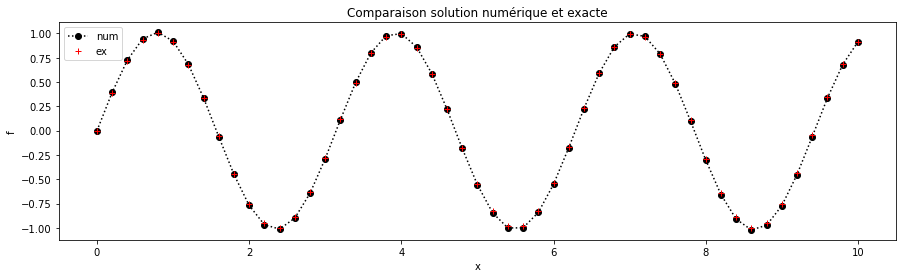

In [24]:
## 1. Librairies
############################

# numpy pour le calcul matriciel, pyplot de matplotlib pour graphiques
import numpy as np
import matplotlib.pyplot as plt


## 2. Paramètres et fonctions
#############################

#Taille du domaine
L=10 

# résolution
M=50

# définition de la fonction g(x)
def gfun(x):
    g=-4*np.sin(2*x)
    return g

# valeurs aux bords
C_0=0
C_L=np.sin(2*L)

# 3. Maillage
#############

#pas d'espace
dx=L/M
a=1/dx**2

#maillage de pts équidistants
x=np.linspace(0,L,M+1)       


# 4. Le vecteur colonne g et la matrice A
#########################################

#g se crée le plus facilement sans boucle
g=gfun(x)
g[0]=C_0   #corriger premier point
g[M]=C_L   #corriger dernier point

#la matrice A est principalement remplie de zéros et de taille M+1,M+1
A=np.zeros([M+1,M+1])

A[0,0]=1  #première et dernière ligne ont 1 sur la diagonale
A[M,M]=1

#les autres lignes se remplissent à l'aide d'une boucle
for j in range(1,M): # pour j allant de 1 à M-1
    A[j,[j-1,j,j+1]]=[a,-2*a,a]


# 5. Solution du système linéaire
#################################
# On trouve f la solution de Af = g.

f=np.linalg.solve(A,g)

# 6. Est-ce qu'on retrouve bien la solution exacte voulue ? 
##########################################################
# La solution exacte est f(x)=sin 2x. On compare cette solution à notre solution numérique

#solution exacte
f_ex=np.sin(2*x)
errmax=np.max(np.abs(f-f_ex))
print('L\'erreur maximale est :',errmax)

#graphiquement
fig=plt.figure(figsize=(15, 4))
plt.plot(x,f,'ko:',label='num')
plt.plot(x,f_ex,'r+',label='ex')
plt.title('Comparaison solution numérique et exacte')
plt.xlabel('x')
plt.ylabel('f')
plt.legend()
plt.show()

## Deuxième problème du cours : Poisson 1D & Neuman 

On peut également imposer des conditions aux limites de type Neuman. On résout donc une deuxième fois le problème 
 $$ \frac{d^2 f}{d x^2} = g \ , \ x \in [0,L]$$ 
 cette fois-ci muni de conditions aux limites de type Neuman
 $$ f(0) = C_0 \ , \ \frac{df}{dx}(L) = D_L .$$ 
 Ici $g(x)$ et $C_0, D_L$ sont connus. 
 
La discrétisation du problème donne alors le problème matriciel suivant

 $$ \underbrace{\left [ \begin{array}{cccccc} 
 1 & & \\ a & -2a & a \\
 & a & -2a & a  \\
 & & \ddots & \ddots &  \ddots \\
 & & & a & -2a & a \\
 & & & b & -4b & 3b \end{array} \right ]}_{\mathbf{A}} \underbrace{\left [\begin{array}{c} f_0 \\ f_1 \\ \vdots \\ \vdots \\ f_{M-1} \\ f_M \end{array}\right ]}_{\mathbf{f}} = \underbrace{ \left [ \begin{array}{c} C_0 \\ g_1 \\ \vdots \\ \vdots  \\ g_{M-1} \\ D_L \end{array}\right ] }_{\mathbf{g}}  $$
où l'on note $a = 1/ \delta x^2 $ et $b=1/(2 \delta x)$. 

Faire le même test que dans le code précédent, c.a.d. essayer de retrouver numériquement la solution $f(x) = sin (2x)$.  


L'erreur maximale est : 0.802542731925969


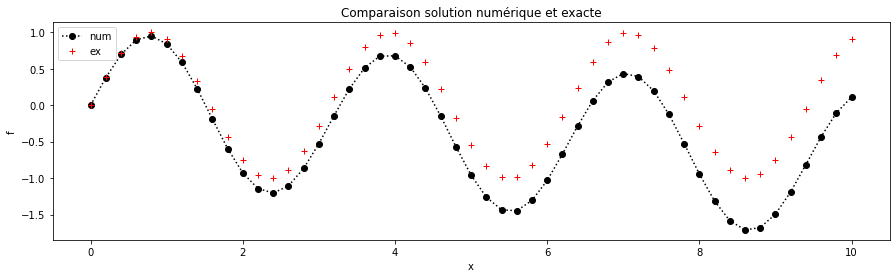

In [14]:
## 1. Librairies
################

# numpy pour le calcul matriciel, pyplot de matplotlib pour graphiques
import numpy as np
import matplotlib.pyplot as plt


## 2. Paramètres et fonctions
#############################

#Taille du domaine
L=10 

# résolution
M=50

# définition de la fonction g(x)
def gfun(x):
    g=-4*np.sin(2*x)
    return g

# valeurs aux bords
C_0=0
D_L=2*np.cos(2*L)

# 3. Maillage
#############

#pas d'espace
dx=L/M
a=1/dx**2
b=1/(2*dx)

#maillage de pts équidistants
x=np.linspace(0,L,M+1)       

# 4. Le vecteur colonne g et la matrice A
#########################################

#g se crée le plus facilement sans boucle
g=gfun(x)
g[0]=C_0   #corriger premier point
g[M]=D_L   #corriger dernier point

#la matrice A est principalement remplie de zéros et de taille M+1,M+1
A=np.zeros([M+1,M+1])

#première et dernière ligne
A[0,0]=1 
A[M,[M-2,M-1,M]] = [b,-4*b,3*b] 

#les autres lignes se remplissent à l'aide d'une boucle
for j in range(1,M): # pour j allant de 1 à M-1
    A[j,[j-1,j,j+1]]=[a,-2*a,a]

# 5. Solution du système linéaire
#################################
# On trouve f la solution de Af = g.

f=np.linalg.solve(A,g)

# 6. Est-ce qu'on retrouve bien la solution exacte voulue ? 
##########################################################
# La solution exacte est f(x)=\sin 2x. On compare cette solution à notre solution numérique

#solution exacte
f_ex=np.sin(2*x)
errmax=np.max(np.abs(f-f_ex))
print('L\'erreur maximale est :',errmax)

#graphiquement
fig=plt.figure(figsize=(15, 4))
plt.plot(x,f,'ko:',label='num')
plt.plot(x,f_ex,'r+',label='ex')
plt.title('Comparaison solution numérique et exacte')
plt.xlabel('x')
plt.ylabel('f')
plt.legend()
plt.show()

## Troisième problème du cours : Poisson 1D & schéma numérique 

On peut également choisir un schéma numérique avec une résolution différente. On résoud donc une troisième fois le problème 
 $$ \frac{d^2 f}{d x^2} = g \ , \ x \in [0,L]$$ 
 cette fois-ci muni de conditions aux limites de type Dirichlet
 $$ f(0) = C_0 \ , \ f(L) = C_L .$$ 
 Ici $g(x)$ et $C_0, C_L$ sont connus. 
 
En revanche, on choisit d'utiliser l'approximation de la dérivée centrée d'ordre supérieure (non dérivée dans le cours), qui donne
$$ \frac{d^2f}{dx^2}_i = \frac{-f_{i-2} + 16f_{i-1} - 30f_i + 16f_{i+1} - f_{i+2}}{12\delta x^2} $$

Comme la dérivée fait intervenir 5 points, on doit alors rajouter deux conditions aux limites supplémentaires : 
$$ f(1) = C_1 \ , \ f(L-1) = C_{L1} $$ 

La discrétisation du problème donne alors le problème matriciel suivant

 $$ \underbrace{\left [ \begin{array}{cccccccc} 
 1 & & & & \\ & 1 & & & \\ -a & 16a & -30a & 16a & -a \\
 & -a & 16a & -30a & 16a & -a \\
 & & \ddots & \ddots & \ddots \\
 & & & -a & 16a & -30a & 16a & -a \\
 & & & & & & 1 & \\ & & & & & & & 1 \end{array} \right ]}_{\mathbf{A}} \underbrace{\left [\begin{array}{c} f_0 \\ f_1 \\ f_2 \\ \vdots \\ \vdots \\ f_{M-2} \\ f_{M-1} \\ f_M \end{array}\right ]}_{\mathbf{f}} = \underbrace{ \left [ \begin{array}{c} C_0 \\ C_1 \\ g_2 \\ \vdots \\ \vdots  \\ g_{M-2} \\ D_{L1} \\ D_L \end{array}\right ] }_{\mathbf{g}}  $$
où l'on note $a = 1/ (12\delta x^2) $. 

Faire le même test que dans le code précédent, c.a.d. retrouver numériquement la solution $f(x) = sin (2x)$. Quelle est désormais la précision par rapport au schéma numérique précédent ? 


L'erreur maximale est : 0.00045740146589190456


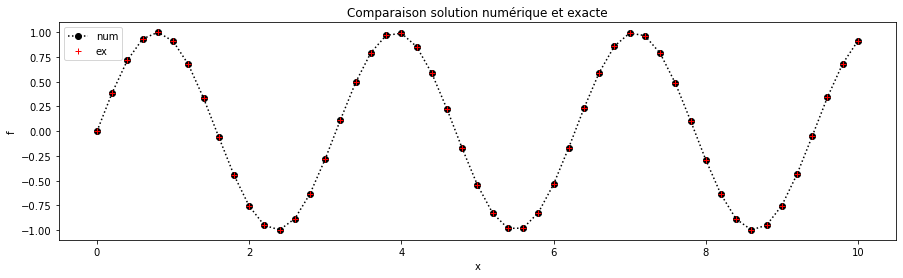

In [23]:
## 1. Librairies
################

# numpy pour le calcul matriciel, pyplot de matplotlib pour graphiques
import numpy as np
import matplotlib.pyplot as plt


## 2. Paramètres et fonctions
#############################

#Taille du domaine
L=10 

# résolution
M=50

# définition de la fonction g(x)
def gfun(x):
    g=-4*np.sin(2*x)
    return g

# 3. Maillage
#############

#pas d'espace
dx=L/M
#a=1/dx**2
a=1/(12*dx**2)
b=1/(2*dx)

#maillage de pts équidistants
x=np.linspace(0,L,M+1)   

# valeurs aux bords
C_0=0
C_1=np.sin(2*dx)
C_L=np.sin(2*L)
C_L1=np.sin(2*(L-dx))

# 4. Le vecteur colonne g et la matrice A
#########################################

#g se crée le plus facilement sans boucle
g=gfun(x)
g[0]=C_0   #corriger premier point
g[1]=C_1   #corriger premier point
g[M-1]=C_L1   #corriger dernier point
g[M]=C_L   #corriger dernier point

#la matrice A est principalement remplie de zéros et de taille M+1,M+1
A=np.zeros([M+1,M+1])

#première et dernière ligne
A[0,0]=1 
A[1,1]=1 
A[M-1,M-1]=1
A[M,M]=1

#les autres lignes se remplissent à l'aide d'une boucle
for j in range(2,M-1): # pour j allant de 1 à M-1
    A[j,[j-2,j-1,j,j+1,j+2]]=[-a,16*a,-30*a,16*a,-a]

# 5. Solution du système linéaire
#################################
# On trouve f la solution de Af = g.

f=np.linalg.solve(A,g)

# 6. Est-ce qu'on retrouve bien la solution exacte voulue ? 
##########################################################
# La solution exacte est f(x)=\sin 2x. On compare cette solution à notre solution numérique

#solution exacte
f_ex=np.sin(2*x)
errmax=np.max(np.abs(f-f_ex))
print('L\'erreur maximale est :',errmax)

#graphiquement
fig=plt.figure(figsize=(15, 4))
plt.plot(x,f,'ko:',label='num')
plt.plot(x,f_ex,'r+',label='ex')
plt.title('Comparaison solution numérique et exacte')
plt.xlabel('x')
plt.ylabel('f')
plt.legend()
plt.show()

## Quatrième problème du cours :  Maillage non-uniforme

L'utilisation d'un maillage uniforme est pratique mais une nécessité absolue. Parfois, on recontre des problèmes dans lequel on a besoin de plus de résolution à un endroit qu'un autre et un maillage non-uniforme peut alors être intéressant. Le but de l'exercice est de résoudre numériquement le problème  
$$
- \epsilon^2 \frac{d^2 f}{d x^2} + f = 1  \ , \ x \in [0,1]
$$
et
$$
f(0) = f(1) = 0
$$
à l'aide d'un maillage non-uniforme. Si on suppose $\epsilon \ll 1$ un petit paramètre, alors on a comme solution $f=1$ dans la plupart du domaine, loin des bords. Proche des bord, il se dévellopera une couche limite d'épaisseur $\epsilon$. Le maillage non-uniforme est ici généré pour vous et vous pouvez changer $M$. 

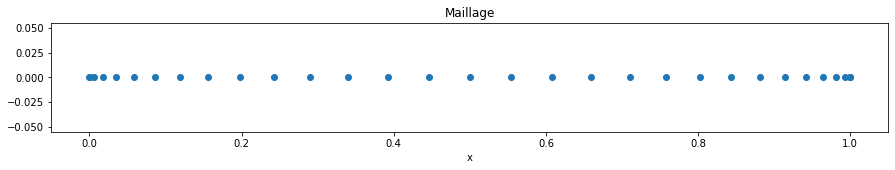

In [13]:
M=30
x=np.zeros(M+1)
x[0]=0
x[M]=1
for j in range(1,M): #pour j de 1 a M-1
    x[j]=0.5-0.5*np.cos((2*j-1)*np.pi/(2*(M-1)))
    
x=x.reshape([M+1,1])         #convertir en vecteur colonne

#graphiquement
fig=plt.figure(figsize=(15, 2))
plt.plot(x,np.zeros([M+1,1]),'o')
plt.title('Maillage')
plt.xlabel('x')
plt.show()


Pour discrétiser la dérivée d'ordre 2, on utiliser la formule de différence finie qu'on a trouvée dans le premier chapitre à partir du polynôme d'interpolation de Lagrange

$$
\frac{d^2 f_j}{dx^2} =  \frac{2 f_{j-1} }{(x_{j-1}-x_j)(x_{j-1} - x_{j+1})} +  \frac{2 f_{j} }{(x_{j}-x_{j-1})(x_{j} - x_{j+1})} +  \frac{2 f_{j+1} }{(x_{j+1}-x_{j-1})(x_{j+1} - x_{j})} 
$$

Le problème admet une solution analytique que vous pouvez trouver assez facilement. Cette solution analytique vous permettra de tester votre solution numérique. Utiliser $\epsilon = 0.1$ pour commencer. 

L'erreur maximale est : 0.00334180996647776


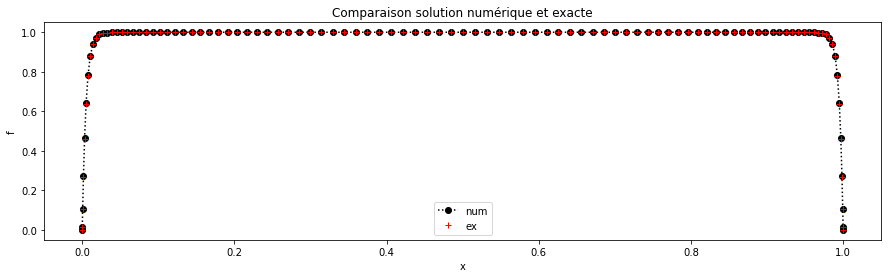

In [18]:
## 1. Entrées et librairies
############################

# numpy pour le calcul matriciel, pyplot de matplotlib pour graphiques
import numpy as np
import matplotlib.pyplot as plt


## 2. Paramètres
################
M=100
epsil=0.005


## 3. Maillage
##############

x=np.zeros(M+1)
x[0]=0
x[M]=1
for j in range(1,M): #pour j de 1 a M-1
    x[j]=0.5-0.5*np.cos((2*j-1)*np.pi/(2*(M-1)))
    
## 4. Le vecteur colonne g et la matrice A
#########################################

#g se crée le plus facilement sans boucle
g=np.ones(M+1)  #un partout
g[0]=0   #corriger premier point
g[M]=0   #corriger dernier point

#la matrice A est principalement remplie de zéros et de taille M+1,M+1
A=np.zeros([M+1,M+1])

#première et dernière ligne 0
A[0,0]=1
A[M,M]=1

#les autres lignes se remplissent à l'aide d'une boucle
#on utilise la formule générale
for j in range(1,M): # pour j allant de 1 à M-1
    A[j,j-1]=-2*epsil**2/((x[j-1]-x[j])*(x[j-1]-x[j+1]))
    A[j,j]=-2*epsil**2/((x[j]-x[j-1])*(x[j]-x[j+1]))+1
    A[j,j+1]=-2*epsil**2/((x[j+1]-x[j-1])*(x[j+1]-x[j]))


## 5. Solution du système linéaire
#################################
# On trouve f la solution de Af = g.

f=np.linalg.solve(A,g)

## 6. Est-ce qu'on retrouve bien la solution exacte voulue ? 
##########################################################

#la solution exacte 
f_ex=1-np.sinh(x/epsil)/np.sinh(1/epsil)+np.sinh((x-1)/epsil)/np.sinh(1/epsil)

errmax=np.max(np.abs(f-f_ex))
print('L\'erreur maximale est :',errmax)

#graphiquement
fig=plt.figure(figsize=(15, 4))
plt.plot(x,f,'ko:',label='num')
plt.plot(x,f_ex,'r+',label='ex')
plt.title('Comparaison solution numérique et exacte')
plt.xlabel('x')
plt.ylabel('f')
plt.legend()
plt.show()

## Cinquième problème du cours :  Problème aux valeurs propres
Notre dernier problème est celui d'un problème aux valeurs propres
 $$ 
- \frac{d^2 f}{d x^2} = \lambda f  \ , \ x \in [0,L]
 $$ 
 muni de conditions aux limites de type Dirichlet homogènes
 $$ 
 f(0) = 0 \ , \ f(L) = 0.
 $$ 
 La solution $f(x) = 0$ triviale existe toujours, mais la question ici est d'identifier pour quelles valeurs de $\lambda$ il existe d'autres solutions. Il en existe une infinité et on parle des fonctions propres. Sur cet exemple, il est possible de trouver numériquement et analytiquement la solution et c'est donc un bon cas d'école.   
 
Si on emploie la méthode des différences finies et un maillage uniforme de $M+1$ points, on arrive sur une forme matricielle

$$ 
 \underbrace{\left [ \begin{array}{cccccc} 
 1 \\ -a & 2a & -a \\
 & -a & 2a & -a  \\
 & & \ddots & \ddots &  \ddots \\
 & & & -a & 2a & -a \\
 & & & & & 1 \end{array} \right ]}_{\mathbf{A}} \underbrace{\left [\begin{array}{c} f_0 \\ f_1 \\ \vdots \\ \vdots \\ f_{M-1} \\ f_M \end{array}\right ]}_{\mathbf{f}} = \lambda \  \underbrace{\left [ \begin{array}{cccccc} 
 0 \\ & 1 \\
 & & 1 &  \\
 & &  & \ddots &   \\
 & & && 1 &  \\
 & & & & & 0 \end{array} \right ]}_{\mathbf{B}} \underbrace{\left [\begin{array}{c} f_0 \\ f_1 \\ \vdots \\ \vdots \\ f_{M-1} \\ f_M \end{array}\right ]}_{\mathbf{f}}
$$

Cela correspond à un problème aux valeurs propres généralisé $\mathbf{A} \mathbf{f} = \lambda \mathbf{B} \mathbf{f}$. En python, il suffit de définir les matrices $\mathbf{A}$ et $\mathbf{B}$. On utilisera la librairie scipy et l'instruction eig

Les 3 premières valeurs propres à comparer avec 1, 4, 9: [0.99999671 3.99994736 8.99973352]


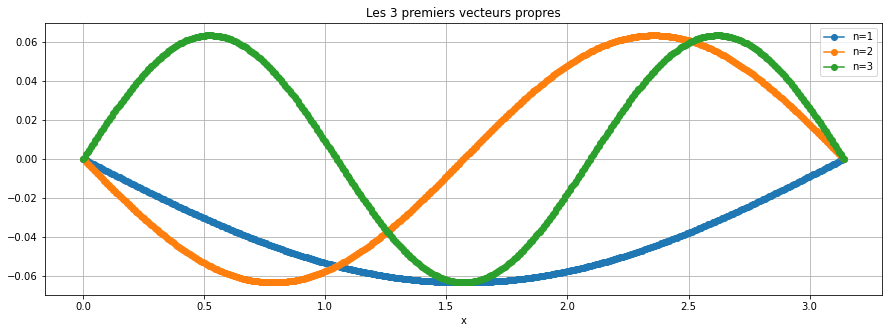

In [3]:
#1. Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

#2. Paramètres
L=np.pi 
M=500

#3. Maillage et co.
dx=L/M
a=1/dx**2
x=np.arange(0,L+dx,dx) 

#4. Matrices A et B
A=np.zeros([M+1,M+1]) #la matrice A est principalement remplie de zéros et de taille M+1,M+1
B=np.eye(M+1)         #la matrice B est principalement une matrice identité 

A[0,0]=1   #première et dernière ligne ont 1 sur la diagonale
A[M,M]=1  
B[0,0]=0   #première et dernière ligne ont 0 sur la diagonale
B[M,M]=0

#les autres lignes se remplissent à l'aide d'une boucle
for j in range(1,M): # pour j allant de 1 à M-1
    A[j,[j-1,j,j+1]]=[-a,2*a,-a]

#5. Calculer les valeurs et vecteurs propres
lam,v=eig(A,B)

#ecarter les valeurs propres inf
test=lam!=np.inf
lam=lam[test]
v=v[:,test]

#ordonner les valeurs propres (ordre croissant)
ind=np.argsort(np.real(lam))   #on récupère les indices de permutation

#on réordonne
lam=lam[ind]   
v=v[:,ind]

#6. message et graphe
print('Les 3 premières valeurs propres à comparer avec 1, 4, 9:',np.real(lam[0:3]))

#montrer les 7 premières fonctions propres 
fig=plt.figure(figsize=(15, 5))
for n in range(3):
    plt.plot(x,v[:,n],'o-',label='n='+str(n+1))

plt.title('Les '+str(n+1)+' premiers vecteurs propres')
plt.xlabel('x')
plt.legend()
plt.grid()
plt.show()
